## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Python37\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
192/196 [============================>.] - ETA: 0s - loss: 2.2711 - accuracy: 0.1626WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026C1185A828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

196/196 [==============================] - 2s 11ms/step - loss: 1.5401 - accuracy: 0.4652 - val_loss: 1.5602 - val_accuracy: 0.4544
Epoch 101/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5379 - accuracy: 0.4649 - val_loss: 1.5587 - val_accuracy: 0.4541
Epoch 102/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5359 - accuracy: 0.4665 - val_loss: 1.5559 - val_accuracy: 0.4558
Epoch 103/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5339 - accuracy: 0.4675 - val_loss: 1.5526 - val_accuracy: 0.4560
Epoch 104/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5318 - accuracy: 0.4682 - val_loss: 1.5523 - val_accuracy: 0.4549
Epoch 105/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5297 - accuracy: 0.4679 - val_loss: 1.5511 - val_accuracy: 0.4568
Epoch 106/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5280 - accuracy: 0.4690 - val_loss: 1.5501 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.3572 - accuracy: 0.5273 - val_loss: 1.4381 - val_accuracy: 0.4934
Epoch 213/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3562 - accuracy: 0.5273 - val_loss: 1.4279 - val_accuracy: 0.4929
Epoch 214/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3541 - accuracy: 0.5271 - val_loss: 1.4265 - val_accuracy: 0.4956
Epoch 215/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3525 - accuracy: 0.5285 - val_loss: 1.4337 - val_accuracy: 0.4922
Epoch 216/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3516 - accuracy: 0.5292 - val_loss: 1.4260 - val_accuracy: 0.4974
Epoch 217/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3508 - accuracy: 0.5284 - val_loss: 1.4482 - val_accuracy: 0.4886
Epoch 218/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3493 - accuracy: 0.5299 - val_loss: 1.4263 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.2187 - accuracy: 0.5737 - val_loss: 1.3670 - val_accuracy: 0.5208
Epoch 325/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2173 - accuracy: 0.5735 - val_loss: 1.3813 - val_accuracy: 0.5093
Epoch 326/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2164 - accuracy: 0.5750 - val_loss: 1.3661 - val_accuracy: 0.5125
Epoch 327/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2159 - accuracy: 0.5744 - val_loss: 1.3899 - val_accuracy: 0.5101
Epoch 328/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2143 - accuracy: 0.5743 - val_loss: 1.3912 - val_accuracy: 0.5068
Epoch 329/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2128 - accuracy: 0.5756 - val_loss: 1.3624 - val_accuracy: 0.5199
Epoch 330/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2118 - accuracy: 0.5761 - val_loss: 1.3798 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.1021 - accuracy: 0.6161 - val_loss: 1.4135 - val_accuracy: 0.5142
Epoch 437/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0987 - accuracy: 0.6157 - val_loss: 1.3432 - val_accuracy: 0.5217
Epoch 438/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0981 - accuracy: 0.6181 - val_loss: 1.3752 - val_accuracy: 0.5177
Epoch 439/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0983 - accuracy: 0.6163 - val_loss: 1.4079 - val_accuracy: 0.5078
Epoch 440/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0964 - accuracy: 0.6176 - val_loss: 1.3298 - val_accuracy: 0.5331
Epoch 441/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0961 - accuracy: 0.6171 - val_loss: 1.3479 - val_accuracy: 0.5271
Epoch 442/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0956 - accuracy: 0.6191 - val_loss: 1.3375 - val_accuracy:

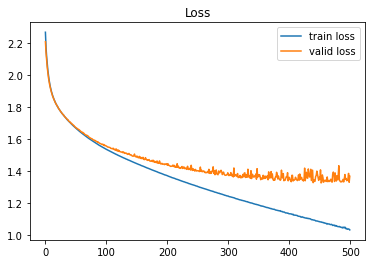

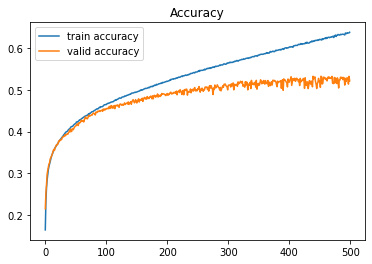

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()